# ***Exploratory Data Analysis Of Haberman Cancer Survival Dataset***

**What is Haberman Dataset?**

  It is a dataset that contains datas from a study conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


# ***Importing libraries and the dataset***

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import files

In [0]:
haberman = files.upload()

Saving haberman.csv to haberman.csv


In [0]:
haberman = pd.read_csv("haberman.csv")

In [0]:
#How many datapoints?

haberman.shape

(305, 4)

The dataset contains 305 Rows and 4 Coloumn.

In [0]:
#What are the column names in the dataset?
haberman.columns

Index(['30', '64', '1', '1.1'], dtype='object')

Coloumn names is not provided in the dataset.

In [0]:
haberman.columns = ["Age", "Operation_Year", "Axil_Nodes", "Survival_Status"]
haberman.columns

Index(['Age', 'Operation_Year', 'Axil_Nodes', 'Survival_Status'], dtype='object')

Names of the column was referred from the dataset provided. 

In [0]:
haberman.head()

,Age,Operation_Year,Axil_Nodes,Survival_Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


The first 5 datapoints are printed here.



*   First column shows the age of patients

*   Second column shows the year each patient had undergone the surgery during 1958 and 1970 

*  Third column shows the number of numbers of tumors they found

*   Fourth column shows the survival status of the patients.

  If the value is 1 - The patient survived 5 years or more
  
  If the value is 2 - The patient survived less than 5 years
  



In [0]:
haberman.describe()

,Age,Operation_Year,Axil_Nodes,Survival_Status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**Age**


*   The age of the patients vary from 30 to 83 with a mean of 52.

*   75% of the patients were almost 61 years old.



**Operation_Year **


*   Oldest patient to have the surgery was 69 years old and the youngest was 58 years old .With a mean of age 62.

*   75% of the patients had operation at the age 66.


**Axil_Nodes**



*   More than 25% of the patients had no positive lymph nodes and 75% of the patient had less than 5 positive lymph nodes

*   52 positive lymph was found in a single patient.

**Survival_Status**


*   More than 50% of the patients survived 5 years or more.













In [0]:
haberman["Axil_Nodes"].value_counts()

0     136
1      40
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: Axil_Nodes, dtype: int64

# **2-D Scatterplot**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


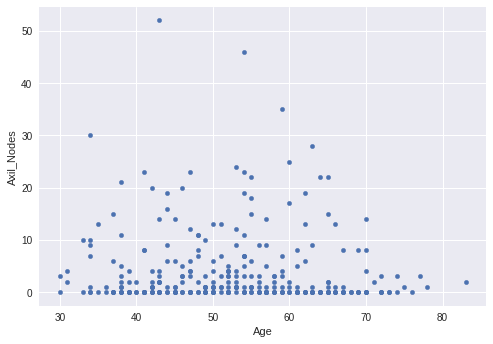

In [0]:
haberman.plot(kind='scatter', x='Age', y='Axil_Nodes')
plt.show()

Majority of the patients had no sign of positive lymph nodes

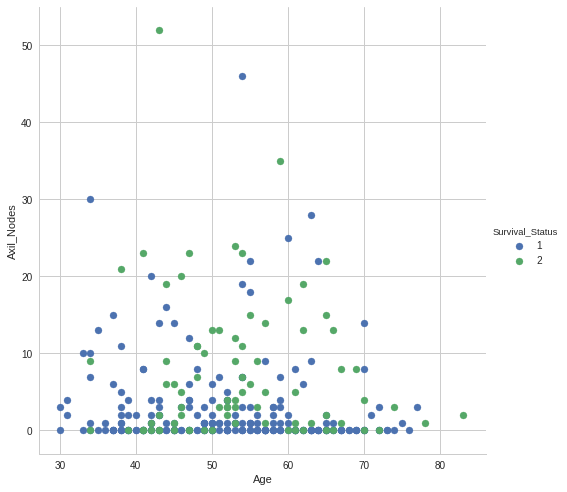

In [0]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival_Status", size = 7) \
.map(plt.scatter, "Age", "Axil_Nodes") \
.add_legend();
plt.show()



*   Most of the patients had 0 positive lymph nodes.

*   Most of the patients with no positive lymph nodes have survived 5 years or more.



#**Pair-Plot**

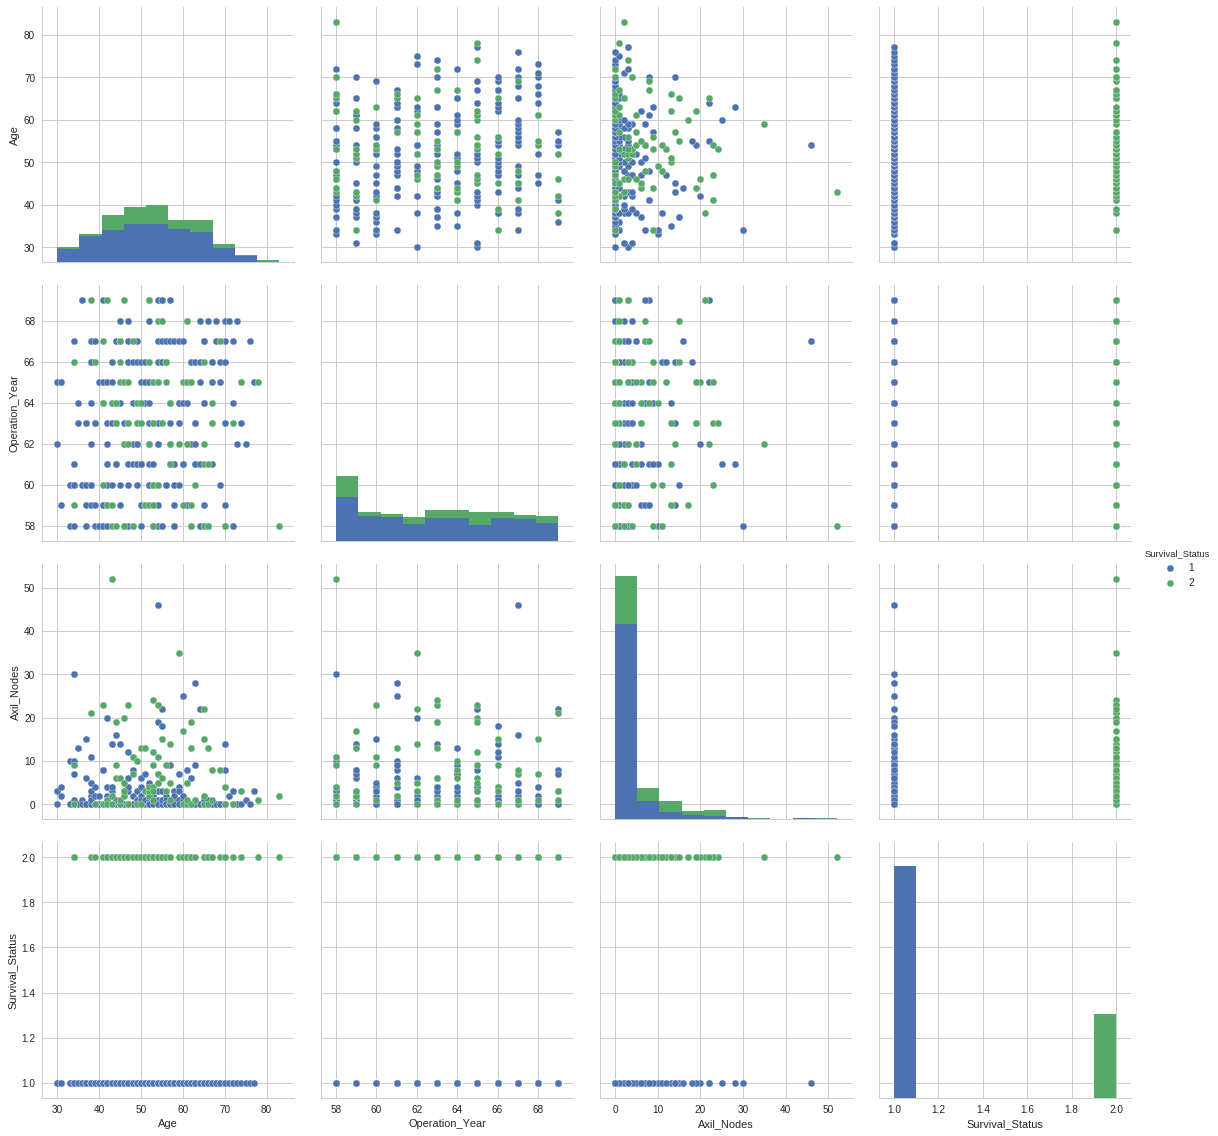

In [0]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Survival_Status", size = 4);
plt.show()

The plots with x axis or y axis as Survival Status is not a helpful study.

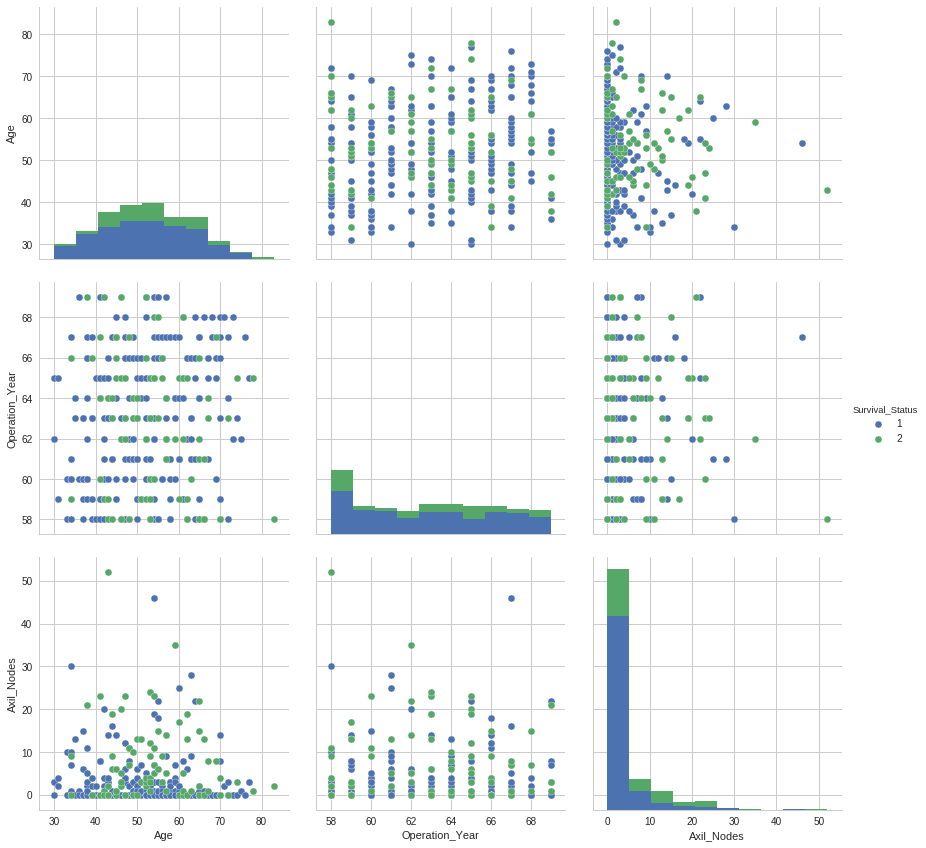

In [0]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Survival_Status",vars = ['Age', 'Operation_Year', 'Axil_Nodes'], size = 4)
plt.show()


*   Plot between Axil Nodes and Age is very understanding. Most of the patient who survived have no positive lymph nodes.






#**Histogram**

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


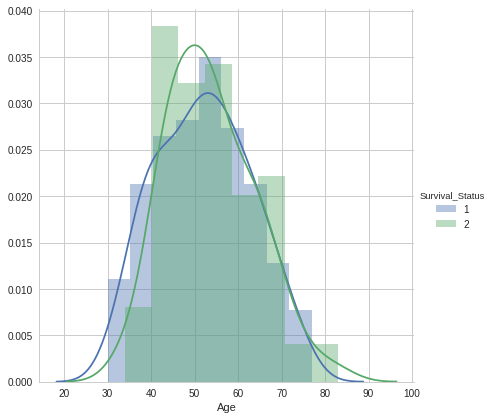

In [0]:
plt.close()

sns.FacetGrid(haberman, hue="Survival_Status", size = 6) \
.map(sns.distplot,"Age") \
.add_legend();

plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


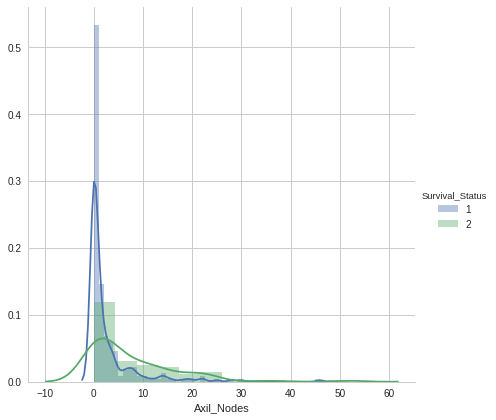

In [0]:
plt.close()

sns.FacetGrid(haberman, hue="Survival_Status", size = 6) \
.map(sns.distplot,"Axil_Nodes") \
.add_legend();

plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


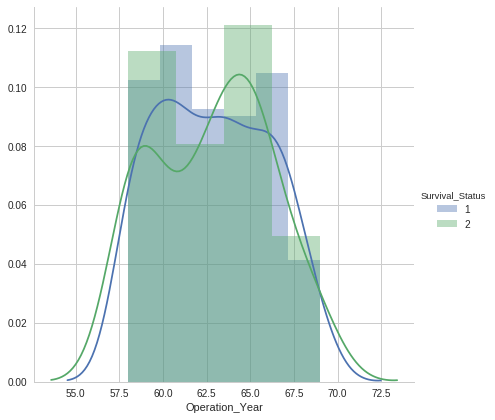

In [0]:
plt.close()

sns.FacetGrid(haberman, hue="Survival_Status", size = 6) \
.map(sns.distplot,"Operation_Year") \
.add_legend();

plt.show()

Histogram of Axil nodes shows us that most of the patients who survived for 5 or more years had no positive lymph nodes.

#**CDF**

In [0]:
alive = haberman.loc[haberman["Survival_Status"]==1]
dead = haberman.loc[haberman["Survival_Status"]==2]

The dataset is divided into two set based on the survival status

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'Pdf of the patients who survived more than 5 years' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


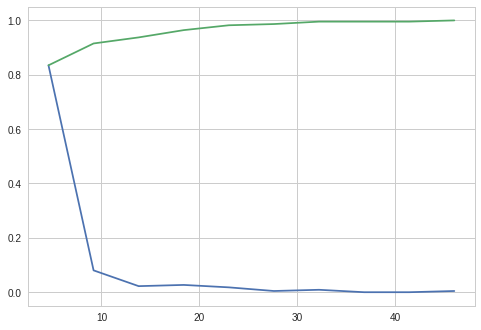

In [0]:
counts , bin_edges = np.histogram(alive['Axil_Nodes'], bins = 10, density = True)

pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.legend(['Pdf of the patients who survived more than 5 years'],['CDF of the patients who survived more than 5 years'])

plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'Pdf of the patients who died in 5 years' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


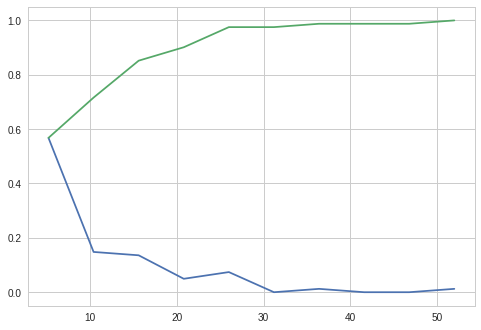

In [0]:
counts , bin_edges = np.histogram(dead['Axil_Nodes'], bins = 10, density = True)

pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.legend(['Pdf of the patients who died in 5 years'],['CDF of the patients who died in 5 years'])

plt.show()

#**Mean, Variance and Std-dev**

Let us see the mean , variance and std deviation of patients who lived more than 5 years and less than 5 years.

In [0]:
print("Patients who survived for more than 5 years")
alive.describe()

Patients who survived for more than 5 years


,Age,Operation_Year,Axil_Nodes,Survival_Status
count,224.000000,224.000000,224.000000,224.0
mean,52.116071,62.857143,2.799107,1.0
std,10.937446,3.229231,5.882237,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [0]:
print("Patients who survived less than 5 years")
dead.describe()

Patients who survived less than 5 years


,Age,Operation_Year,Axil_Nodes,Survival_Status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


#**Median, Percentiles, Quantiles, IQR and MAD**

In [0]:
print("Medians:")
print(np.median(alive['Axil_Nodes']))
print(np.median(dead['Axil_Nodes']))
print("")

print("Quantiles:")
print(np.percentile(alive['Axil_Nodes'],np.arange(0,100,25)))
print(np.percentile(dead['Axil_Nodes'],np.arange(0,100,25)))
print("")

print("50th percentile")
print(np.percentile(alive['Axil_Nodes'],50))
print(np.percentile(dead['Axil_Nodes'],50))



Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

50th percentile
0.0
4.0


In [0]:
from statsmodels import robust as rb


In [0]:
print("MAD")
print(rb.mad(alive['Axil_Nodes']))
print(rb.mad(dead['Axil_Nodes']))

MAD
0.0
5.930408874022408


#**Box plot and Whiskers**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


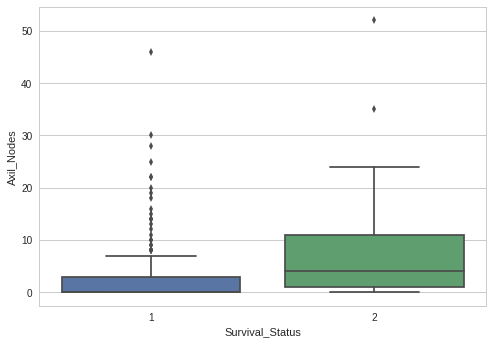

In [0]:
sns.boxplot(x="Survival_Status", y="Axil_Nodes", data = haberman,)
plt.show()

*  Most of the patients with less number of positive lymph survived more than patients with more number of positive lymph

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


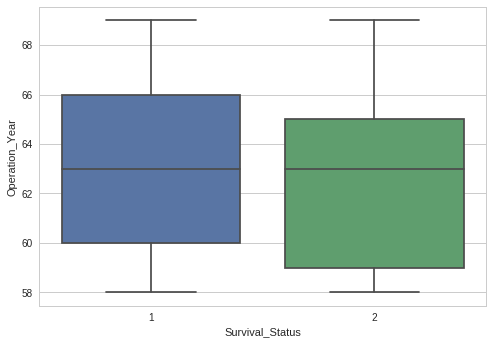

In [0]:
sns.boxplot(x="Survival_Status", y="Operation_Year", data = haberman)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


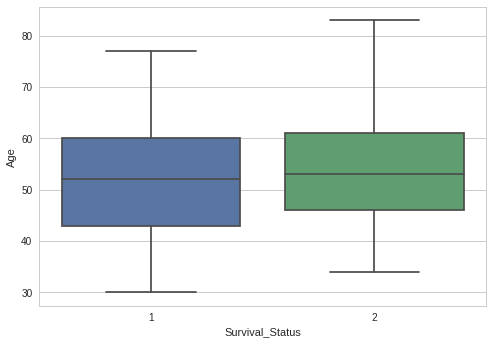

In [0]:
sns.boxplot(x = "Survival_Status", y = "Age", data=haberman)
plt.show()

*  Patients who survived more than 5 years aged more than 40 to 60 years old

* Patients who survived less than 5 years aged between 45 to 60+ years old

#**Violin Plot**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


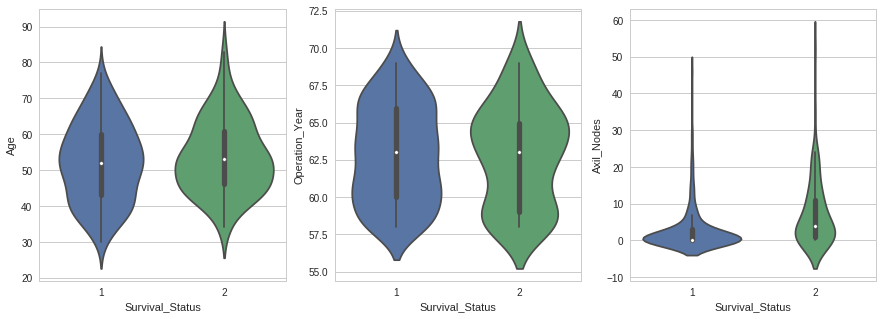

In [0]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

for idx, feature in enumerate(list(haberman.columns)[:-1]):
  sns.violinplot(x="Survival_Status", y=feature,data=haberman, ax=axes[idx])
  
plt.show()



*   80% of the patients have less than or equal to 5 lymph survived more than 5years.

*   Number of positive lymph nodes of the survivors is more from 0 to 5



#**Contour plot**

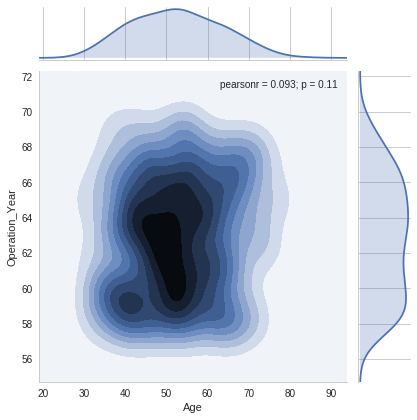

In [0]:
sns.jointplot(x="Age", y="Operation_Year", data = haberman, kind = "kde")
plt.show()

* Most of the patients have undergone operation between the age 40 to 60 years old.